In [38]:
import numpy as np  # For numerical computations and array manipulations
import matplotlib.pyplot as plt  # For plotting and visualization
from sklearn.manifold import TSNE  # For t-SNE dimensionality reduction


In [39]:
Shashwat_df = np.load('/content/cstr_rawdata.npy')  # Load dataset from .npy file


In [40]:
Shashwat_df.shape  # Output: (number of samples, number of features + 4 metadata columns)


(2860, 1404)

In [41]:
features_matrix = Shashwat_df[:, :-4]  # Raw time-series signals
fault_type_labels = Shashwat_df[:, -4]  # Fault type (0-13, including normal)
operating_domain_labels = Shashwat_df[:, -3]  # Domain index (0–15)
param_noise_levels = Shashwat_df[:, -2]  # Noise level ε
reaction_orders = Shashwat_df[:, -1]  # Reaction order N


## Exploring domains

In [43]:
np.unique(operating_domain_labels, return_counts=True)  # Unique domain labels and their counts


(array([0., 1., 2., 3., 4., 5., 6.]),
 array([1300,  260,  260,  260,  260,  260,  260]))

There are 1300 (100x per fault + 100x for normal operation) samples in the source domain (i.e. reaction order $N = 1$ and parameter noise $\epsilon= 0.0$). Next, we explore the other domains.

In [44]:
np.unique(reaction_orders, return_counts=True)  # Shows values like 0.5, 1.0, 1.5, 2.0


(array([0.5, 1. , 1.5, 2. ]), array([ 260, 2080,  260,  260]))

There are 4 types of reaction order: 0.5, 1.0, 1.5, and 2.0. This corresponds to the velocity of the reaction $A \rightarrow B$. Each target domain (i.e., a specific combination of $N$ and parameter noise $\epsilon$) has 260 samples (20x samples for each fault + 20x samples for normal operation). There are 4 domains with $N = 1$, i.e., the source domain (which has $N = 1.0$ and $\epsilon = 0.0$), and $N = 1.0$ with $\epsilon \in \{0.1, 0.15, 0.2\}$.

In [45]:
np.unique(param_noise_levels, return_counts=True)  # Values like 0.0, 0.1, 0.15, 0.2


(array([0.  , 0.1 , 0.15, 0.2 ]), array([1300,  260, 1040,  260]))

we now list the combination $(N, \epsilon)$ for each domain label,

In [46]:
print('-' * 49)
print("|{:^15}|{:^15}|{:^15}|".format('Domain Label', "N", "ϵ"))
print('-' * 49)
for domain in np.unique(operating_domain_labels):
    ind = np.where(operating_domain_labels == domain)[0]
    print("|{:^15}|{:^15}|{:^15}|".format(domain, np.unique(reaction_orders[ind]).item(), np.unique(param_noise_levels[ind]).item()))
print('-' * 49)


-------------------------------------------------
| Domain Label  |       N       |       ϵ       |
-------------------------------------------------
|      0.0      |      1.0      |      0.0      |
|      1.0      |      1.0      |      0.1      |
|      2.0      |      1.0      |     0.15      |
|      3.0      |      1.0      |      0.2      |
|      4.0      |      0.5      |     0.15      |
|      5.0      |      1.5      |     0.15      |
|      6.0      |      2.0      |     0.15      |
-------------------------------------------------


## t-SNE Visualisation of raw signals



---



### Source Domain

The feature matrix $X$ is composed by the concatenation of raw signals. There are 7 measured variables, measured through 200min with a sampling rate of 1min. As such, $X \in \mathbb{R}^{2860 \times 1400}$,

In [47]:
source_domain_indices = np.where(operating_domain_labels == 0)[0]
features_matrixs = features_matrix[source_domain_indices]  # Only domain 0 samples
source_domain_labels = fault_type_labels[source_domain_indices]


in this section, let us analyze the signals coming from the source domain. We need to filter the rows of $X$ by $domain\_label:=0$

this now gives us a matrix $X_{s} \in \mathbb{R}^{1300 \times 1400}$.

In [48]:
features_matrixs.shape  # Should return (1300, 1400)


(1300, 1400)

we can now investigate the signals in $X_{s}$. Let us show a few variables for the normal operation,

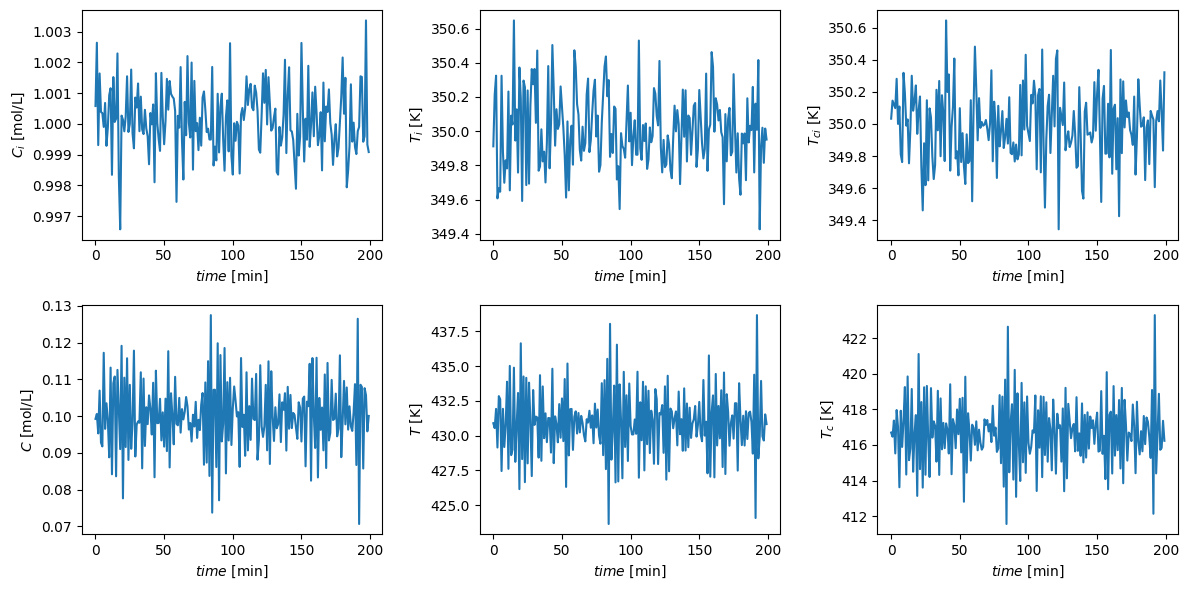

In [49]:
plot_figure, axes = plt.subplots(2, 3, figsize=(12, 6))
time_vector = np.arange(0, 200, 1)

axes[0, 0].plot(time_vector, features_matrixs[-1, :200])
axes[0, 0].set_ylabel('$C_{i}$ [mol/L]')
axes[0, 0].set_xlabel('$time$ [min]')

axes[0, 1].plot(time_vector, features_matrixs[-1, 200:400])
axes[0, 1].set_ylabel('$T_{i}$ [K]')
axes[0, 1].set_xlabel('$time$ [min]')

axes[0, 2].plot(time_vector, features_matrixs[-1, 400:600])
axes[0, 2].set_ylabel('$T_{ci}$ [K]')
axes[0, 2].set_xlabel('$time$ [min]')

axes[1, 0].plot(time_vector, features_matrixs[-1, 600:800])
axes[1, 0].set_ylabel('$C$ [mol/L]')
axes[1, 0].set_xlabel('$time$ [min]')

axes[1, 1].plot(time_vector, features_matrixs[-1, 800:1000])
axes[1, 1].set_ylabel('$T$ [K]')
axes[1, 1].set_xlabel('$time$ [min]')

axes[1, 2].plot(time_vector, features_matrixs[-1, 1000:1200])
axes[1, 2].set_ylabel('$T_{c}$ [K]')
axes[1, 2].set_xlabel('$time$ [min]')

plt.tight_layout()


now, for fault 1,

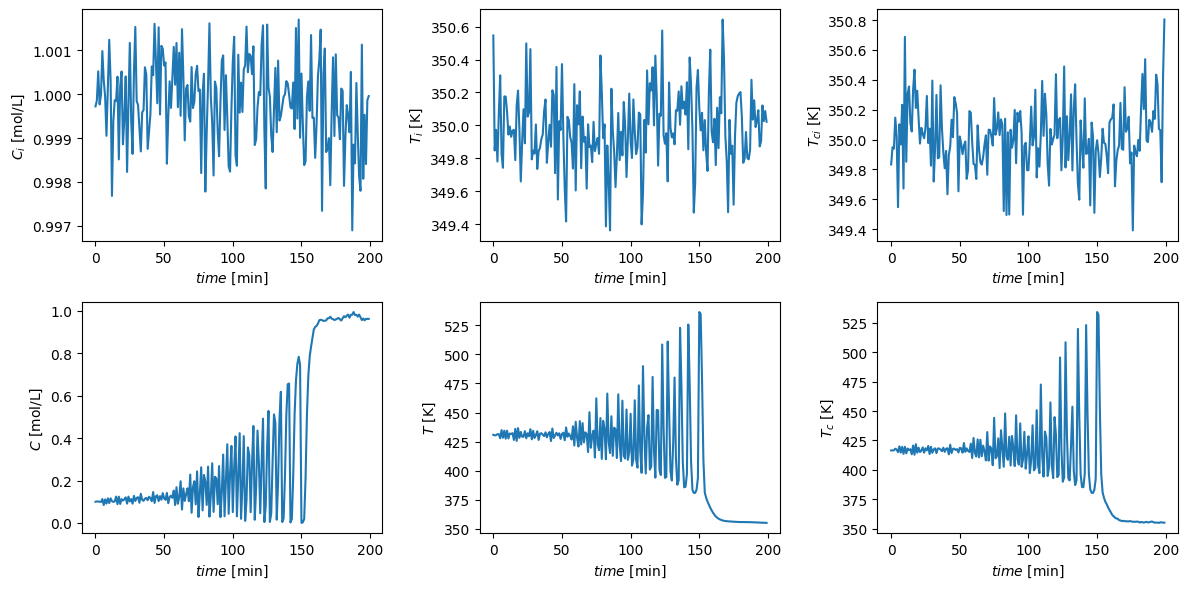

In [50]:
plot_figure, axes = plt.subplots(2, 3, figsize=(12, 6))
time_vector = np.arange(0, 200, 1)

axes[0, 0].plot(time_vector, features_matrixs[0, :200])
axes[0, 0].set_ylabel('$C_{i}$ [mol/L]')
axes[0, 0].set_xlabel('$time$ [min]')

axes[0, 1].plot(time_vector, features_matrixs[0, 200:400])
axes[0, 1].set_ylabel('$T_{i}$ [K]')
axes[0, 1].set_xlabel('$time$ [min]')

axes[0, 2].plot(time_vector, features_matrixs[0, 400:600])
axes[0, 2].set_ylabel('$T_{ci}$ [K]')
axes[0, 2].set_xlabel('$time$ [min]')

axes[1, 0].plot(time_vector, features_matrixs[0, 600:800])
axes[1, 0].set_ylabel('$C$ [mol/L]')
axes[1, 0].set_xlabel('$time$ [min]')

axes[1, 1].plot(time_vector, features_matrixs[0, 800:1000])
axes[1, 1].set_ylabel('$T$ [K]')
axes[1, 1].set_xlabel('$time$ [min]')

axes[1, 2].plot(time_vector, features_matrixs[0, 1000:1200])
axes[1, 2].set_ylabel('$T_{c}$ [K]')
axes[1, 2].set_xlabel('$time$ [min]')

plt.tight_layout()


as you may see, the signals are quite different. Also, their range is different. We thus need to normalize them before applying t-SNE. We normalize each variable independently,

In [51]:
signals = [features_matrixs[:, i * 200: (i + 1) * 200] for i in range(7)]  # Split into 7 variables

for i in range(len(signals)):
    μ, σ = signals[i].mean(), signals[i].std()
    signals[i] = (signals[i] - μ) / σ  # Normalize each variable

features_matrixs = np.concatenate(signals, axis=1)  # Concatenate back to shape (1300, 1400)


In [52]:
tsne = TSNE(n_components=2)  # 2D t-SNE projection
proj = tsne.fit_transform(features_matrixs)


In [53]:

features_matrixs.shape

(1300, 1400)

now that all signals are standardized, we can visualize them in $\mathbb{R}^{2}$ using t-SNE.

(np.float64(-53.65481071472168),
 np.float64(52.90086631774902),
 np.float64(-45.30263347625733),
 np.float64(48.513719749450686))

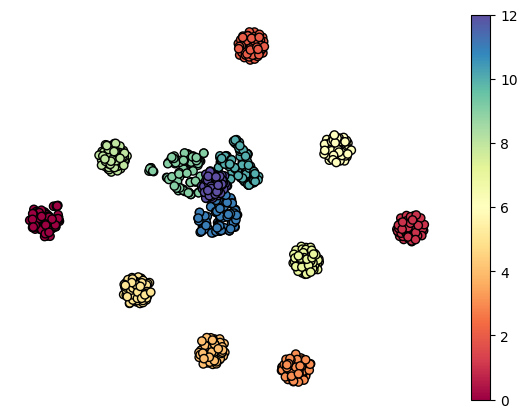

In [56]:
plt.figure(figsize=(7, 5))
sca = plt.scatter(proj[:, 0], proj[:, 1], c=source_domain_labels, cmap=plt.get_cmap('Spectral'), edgecolor='k')
plt.colorbar(sca)
plt.axis('off')


As we can see, classes are well separated in the source domain. A few classes are confused, such as class $13$ (i.e. normal operation), $11$ and $10$. This is further discussed in [1] and [2].

### t-SNE visualization of different domains

We apply the same preprocessing steps for the target domain data.

In [57]:
features_matrixt, yt = [], []
for domain in np.unique(operating_domain_labels).astype(int)[1:]:  # Skip source domain (0)
    ind_t = np.where(operating_domain_labels == domain)[0]
    features_matrixk = features_matrix[ind_t]
    yk = fault_type_labels[ind_t]

    signals = [features_matrixk[:, i * 200: (i + 1) * 200] for i in range(7)]
    for i in range(len(signals)):
        μ, σ = signals[i].mean(), signals[i].std()
        signals[i] = (signals[i] - μ) / σ
    features_matrixk = np.concatenate(signals, axis=1)

    features_matrixt.append(features_matrixk)
    yt.append(yk)


In [58]:
all_features = np.concatenate([features_matrixs] + features_matrixt, axis=0)
all_labels = np.concatenate([source_domain_labels] + yt, axis=0)


next, we show the t-SNE visualization. Note that here, colors represent domains rather than classes.

(np.float64(-64.10658378601075),
 np.float64(62.514794540405276),
 np.float64(-71.36620635986328),
 np.float64(77.91082305908203))

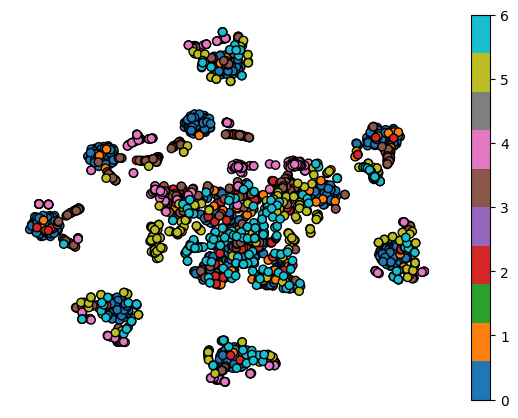

In [59]:
proj = tsne.fit_transform(all_features)

plt.figure(figsize=(7, 5))
sca = plt.scatter(proj[:, 0], proj[:, 1], c=operating_domain_labels, cmap=plt.get_cmap('tab10'), edgecolor='k')
plt.colorbar(sca)
plt.axis('off')


as we can see, there is a significant different in distribution between data from multiple domains. An effort must be done in order to match these distributions, before applying a classifier learned with source domain data, on each of the target domains.